# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [132]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Packages for date conversions for calculating trip durations
import datetime

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


EDA is used to explore the data. This includes checking the data for outliers/plausibility as well as checking the data types and ranges of values.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
print(df0.shape)
print(df0.info())



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print(df0.isna().sum()) # no missing data (already known from the info-method)
print(df0.drop_duplicates().shape) # same shape as raw data --> no duplicates were removed

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
(22699, 18)


Use `.describe()`.

In [5]:
# Use .describe()
df0.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [7]:
# Convert datetime columns to datetime
df0["tpep_pickup_datetime"] = pd.to_datetime(df0["tpep_pickup_datetime"])
df0["tpep_dropoff_datetime"] = pd.to_datetime(df0["tpep_dropoff_datetime"])

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
df0["duration"] = ((df0["tpep_dropoff_datetime"] - df0["tpep_pickup_datetime"])
                   .dt.total_seconds() / 60)
df0["duration_raw"] = df0["tpep_dropoff_datetime"] - df0["tpep_pickup_datetime"]
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_raw
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,0 days 00:16:43


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [9]:
df0.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

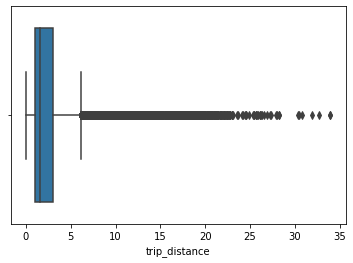

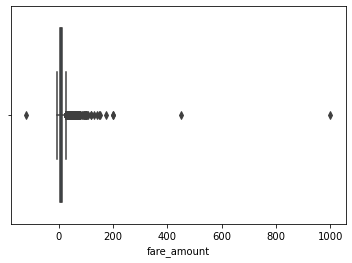

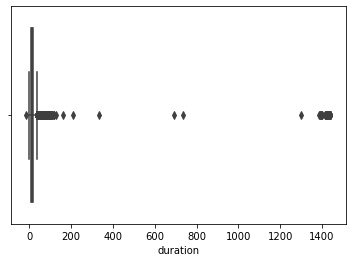

In [10]:
sns.boxplot(data=df0, x="trip_distance")
plt.show()

sns.boxplot(data=df0, x="fare_amount")
plt.show()

sns.boxplot(data=df0, x="duration")
plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All three columns - trip_distance, fare_amount and duration - contain outliers.
2. There are some trip distances of zero miles which seems counterintuitive at first glance. The longest trip went 35 miles, wich - according to takewalks.com (https://www.takewalks.com/blog/nyc-by-the-numbers) - is the longest distance between NYCs borders indicating that the trip went from one end of NYC to the other - or the trip went in circles... or it's a placeholder value.
3. Trip distances, fare amounts and durations of zero make little sense. However, they might occur together. Negative fares a very suspicious.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [11]:
# Are trip distances of 0 bad data or very short trips rounded down?
df0["trip_distance"].sort_values().drop_duplicates().head(20)
# all values are displayed with 2 decimals
# I don't know the imperial system but rounding seems unlikely ot be the reason for the 0-entries


22026    0.00
5501     0.01
16827    0.02
21088    0.03
13517    0.04
10146    0.05
14373    0.06
922      0.07
22523    0.08
22035    0.09
3288     0.10
16467    0.11
314      0.12
1798     0.13
7263     0.14
8861     0.15
22269    0.16
12944    0.17
22049    0.18
17240    0.19
Name: trip_distance, dtype: float64

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [16]:
sum(df0["trip_distance"] == 0)

148

#### `fare_amount` outliers

In [17]:
df0["fare_amount"].sort_values().drop_duplicates().head(20)


12944   -120.00
11204     -4.50
14714     -4.00
5448      -3.50
18565     -3.00
10281     -2.50
5722       0.00
4061       0.01
13970      1.00
7383       2.50
19225      3.00
7794       3.50
15018      4.00
21632      4.50
14165      4.80
15127      5.00
9727       5.50
4964       6.00
14847      6.50
18324      7.00
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [18]:
# Impute values less than $0 with 0
df0["fare_amount"][df0["fare_amount"] < 0] = 0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [19]:
def impute_maximum(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0[col][df0[col] == df0[col].min()] = 0

        # Calculate upper threshold
        q3 = df0[col].quantile(0.75)
        iqr = df0[col].quantile(0.75) - df0[col].quantile(0.25)
        threshold = q3 + (iqr_factor * iqr)

        # Reassign values > threshold to threshold
        df0[col][df0[col] > threshold] = threshold
        
impute_maximum(column_list=["fare_amount"], iqr_factor=6)

#### `duration` outliers


In [20]:
# Call .describe() for duration outliers
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_raw
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,12.897913,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777,0 days 00:17:00.826600290
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,10.541137,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482,0 days 01:01:59.788923306
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333,-1 days +23:43:01
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000,0 days 00:06:39
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333,0 days 00:11:11
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333,0 days 00:18:23
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,62.500000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000,0 days 23:59:33


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [21]:
# Impute a 0 for any negative values
df0["duration"][df0["duration"] < 0] = 0

In [22]:
# Impute the high outliers
impute_maximum(column_list=["duration"], iqr_factor=6)

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [25]:
# Create `pickup_dropoff` column
df0["pickup_dropoff"] = df0.agg('{0[PULocationID]} {0[DOLocationID]}'.format, axis=1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_raw,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,0 days 00:14:04,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,0 days 00:26:30,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,0 days 00:07:12,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,0 days 00:30:15,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,0 days 00:16:43,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [32]:
grouped = (df0
           .groupby("pickup_dropoff") 
           .agg(trip_distance=("trip_distance", "mean"))
          ) # an alternative approach would be to group by both pickup location and dropoff location

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [41]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict.pop("trip_distance")

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [51]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0["mean_distance"] = df0["pickup_dropoff"]

# 2. Map `grouped_dict` to the `mean_distance` column
df0["mean_distance"] = df0["mean_distance"].map(grouped_dict)

# Confirm that it worked
print(df0.head())

df0.merge(grouped, how="inner", on="pickup_dropoff").head() # same result but more convenient

   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1    35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2   106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3    38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4    30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                6           3.34           1                  N   
1                1           1.80           1                  N   
2                1           1.00           1                  N   
3                1           3.70           1                  N   
4                1           4.37           1                  N   

   PULocationID  DOLocationID  ...  extra  mta_tax  tip_amount  tolls_amount  \
0           100           231  ...    0.0      0.5        2.76           0.0   
1         

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance_x,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_raw,pickup_dropoff,mean_distance,trip_distance_y
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,14.066667,0 days 00:14:04,100 231,3.521667,3.521667
1,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,...,0.5,4.59,0.0,0.3,19.89,18.700000,0 days 00:18:42,100 231,3.521667,3.521667
2,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,...,0.5,2.00,0.0,0.3,17.30,14.816667,0 days 00:14:49,100 231,3.521667,3.521667
3,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,...,0.5,0.00,0.0,0.3,28.80,47.533333,0 days 00:47:32,100 231,3.521667,3.521667
4,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,...,0.5,2.85,0.0,0.3,17.15,17.316667,0 days 00:17:19,100 231,3.521667,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [59]:
mean_duration = (df0
                 .groupby("pickup_dropoff") 
                 .agg(mean_duration=("duration", "mean"))
                ) # an alternative approach would be to group by both pickup location and dropoff location

print(mean_duration)
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
df0 = df0.merge(mean_duration, how="inner", on="pickup_dropoff")

# Confirm that it worked
df0.head(10)

                mean_duration
pickup_dropoff               
1 1                  0.466667
10 148              69.366667
100 1               48.183333
100 100              3.130556
100 107             11.200000
...                       ...
97 65                4.483333
97 66               11.233333
97 80               23.833333
97 90               11.766667
97 97                5.794444

[4172 rows x 1 columns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,duration,duration_raw,pickup_dropoff,mean_distance,start_end,mean_duration_x,mean_duration_y,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.3,16.56,14.066667,0 days 00:14:04,100 231,3.521667,2017-03-25 08:55:43 2017-03-25 09:09:47,22.847222,22.847222,22.847222
1,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,...,0.3,19.89,18.700000,0 days 00:18:42,100 231,3.521667,2017-11-14 19:22:51 2017-11-14 19:41:33,22.847222,22.847222,22.847222
2,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,...,0.3,17.30,14.816667,0 days 00:14:49,100 231,3.521667,2017-06-06 23:04:59 2017-06-06 23:19:48,22.847222,22.847222,22.847222
3,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,...,0.3,28.80,47.533333,0 days 00:47:32,100 231,3.521667,2017-06-15 10:05:54 2017-06-15 10:53:26,22.847222,22.847222,22.847222
4,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,...,0.3,17.15,17.316667,0 days 00:17:19,100 231,3.521667,2017-02-01 12:28:41 2017-02-01 12:46:00,22.847222,22.847222,22.847222
5,49385419,1,2017-06-09 12:50:16,2017-06-09 13:14:55,1,4.10,1,N,100,231,...,0.3,19.80,24.650000,0 days 00:24:39,100 231,3.521667,2017-06-09 12:50:16 2017-06-09 13:14:55,22.847222,22.847222,22.847222
6,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.3,20.80,26.500000,0 days 00:26:30,186 43,3.108889,2017-04-11 14:53:28 2017-04-11 15:19:58,24.470370,24.470370,24.470370
7,27638887,2,2017-04-04 06:51:36,2017-04-04 07:09:32,1,4.07,1,N,186,43,...,0.3,16.80,17.933333,0 days 00:17:56,186 43,3.108889,2017-04-04 06:51:36 2017-04-04 07:09:32,24.470370,24.470370,24.470370
8,104493917,2,2017-12-09 23:15:01,2017-12-09 23:25:57,1,1.53,1,N,186,43,...,0.3,10.30,10.933333,0 days 00:10:56,186 43,3.108889,2017-12-09 23:15:01 2017-12-09 23:25:57,24.470370,24.470370,24.470370
9,98266910,1,2017-11-19 14:55:19,2017-11-19 15:14:13,1,3.50,1,N,186,43,...,0.3,16.30,18.900000,0 days 00:18:54,186 43,3.108889,2017-11-19 14:55:19 2017-11-19 15:14:13,24.470370,24.470370,24.470370


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [70]:
# Create 'day' col
df0["day"] = df0["tpep_pickup_datetime"].dt.day_name()

# Create 'month' col
df0["month"] = df0["tpep_pickup_datetime"].dt.month_name()
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,duration_raw,pickup_dropoff,mean_distance,start_end,mean_duration_x,mean_duration_y,mean_duration,day,month,hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0 days 00:14:04,100 231,3.521667,2017-03-25 08:55:43 2017-03-25 09:09:47,22.847222,22.847222,22.847222,Saturday,March,8
1,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,...,0 days 00:18:42,100 231,3.521667,2017-11-14 19:22:51 2017-11-14 19:41:33,22.847222,22.847222,22.847222,Tuesday,November,19
2,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,...,0 days 00:14:49,100 231,3.521667,2017-06-06 23:04:59 2017-06-06 23:19:48,22.847222,22.847222,22.847222,Tuesday,June,23
3,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,...,0 days 00:47:32,100 231,3.521667,2017-06-15 10:05:54 2017-06-15 10:53:26,22.847222,22.847222,22.847222,Thursday,June,10
4,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,...,0 days 00:17:19,100 231,3.521667,2017-02-01 12:28:41 2017-02-01 12:46:00,22.847222,22.847222,22.847222,Wednesday,February,12


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [95]:
# Create 'rush_hour' col
df0["rush_hour"] = df0["tpep_pickup_datetime"].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0["rush_hour"][df0["day"].isin(("Saturday", "Sunday"))] = 0

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,pickup_dropoff,mean_distance,start_end,mean_duration_x,mean_duration_y,mean_duration,day,month,hour,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,100 231,3.521667,2017-03-25 08:55:43 2017-03-25 09:09:47,22.847222,22.847222,22.847222,Saturday,March,8,0
1,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,...,100 231,3.521667,2017-11-14 19:22:51 2017-11-14 19:41:33,22.847222,22.847222,22.847222,Tuesday,November,19,19
2,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,...,100 231,3.521667,2017-06-06 23:04:59 2017-06-06 23:19:48,22.847222,22.847222,22.847222,Tuesday,June,23,23
3,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,...,100 231,3.521667,2017-06-15 10:05:54 2017-06-15 10:53:26,22.847222,22.847222,22.847222,Thursday,June,10,10
4,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,...,100 231,3.521667,2017-02-01 12:28:41 2017-02-01 12:46:00,22.847222,22.847222,22.847222,Wednesday,February,12,12


In [96]:
def rush_hourizer(hour):
    if 6 <= hour["rush_hour"] < 10:
        val = 1
    elif 16 <= hour["rush_hour"] < 20:
        val = 1
    else:
        val = 0
    return val

In [98]:
# Apply the `rush_hourizer()` function to the new column
df0.loc[(df0.day != "saturday") & (df0.day != "sunday"), "rush_hour"] = df0.apply(rush_hourizer, axis=1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,pickup_dropoff,mean_distance,start_end,mean_duration_x,mean_duration_y,mean_duration,day,month,hour,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,100 231,3.521667,2017-03-25 08:55:43 2017-03-25 09:09:47,22.847222,22.847222,22.847222,Saturday,March,8,0
1,96629892,2,2017-11-14 19:22:51,2017-11-14 19:41:33,1,2.79,1,N,100,231,...,100 231,3.521667,2017-11-14 19:22:51 2017-11-14 19:41:33,22.847222,22.847222,22.847222,Tuesday,November,19,1
2,48945131,1,2017-06-06 23:04:59,2017-06-06 23:19:48,1,3.70,1,N,100,231,...,100 231,3.521667,2017-06-06 23:04:59 2017-06-06 23:19:48,22.847222,22.847222,22.847222,Tuesday,June,23,0
3,50574134,2,2017-06-15 10:05:54,2017-06-15 10:53:26,1,4.10,1,N,100,231,...,100 231,3.521667,2017-06-15 10:05:54 2017-06-15 10:53:26,22.847222,22.847222,22.847222,Thursday,June,10,0
4,7282051,1,2017-02-01 12:28:41,2017-02-01 12:46:00,1,3.10,1,N,100,231,...,100 231,3.521667,2017-02-01 12:28:41 2017-02-01 12:46:00,22.847222,22.847222,22.847222,Wednesday,February,12,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

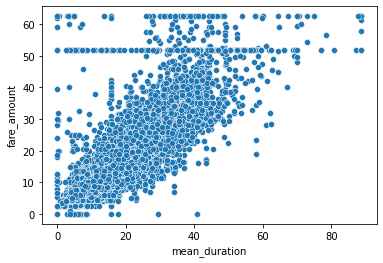

In [99]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(data=df0, x="mean_duration", y="fare_amount")


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [104]:
df0["fare_amount"][df0["fare_amount"] > 50].value_counts().head()

52.0    514
62.5     84
50.5      9
59.0      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [107]:
# Set pandas to display all columns
df0[df0["fare_amount"]==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,duration_raw,pickup_dropoff,mean_distance,start_end,mean_duration_x,mean_duration_y,mean_duration,day,month,hour,rush_hour
151,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,0 days 00:36:48,236 132,19.211667,2017-03-05 19:15:30 2017-03-05 19:52:18,40.500000,40.500000,40.500000,Sunday,March,19,0
152,11895363,1,2017-02-15 13:02:24,2017-02-15 13:32:25,2,18.80,2,N,236,132,1,52.0,0.0,0.5,11.65,5.54,0.3,69.99,30.016667,0 days 00:30:01,236 132,19.211667,2017-02-15 13:02:24 2017-02-15 13:32:25,40.500000,40.500000,40.500000,Wednesday,February,13,0
153,107877815,2,2017-12-20 08:23:16,2017-12-21 08:19:56,1,19.76,2,N,236,132,1,52.0,0.0,0.5,8.78,5.76,0.3,67.34,88.783333,0 days 23:56:40,236 132,19.211667,2017-12-20 08:23:16 2017-12-21 08:19:56,40.500000,40.500000,40.500000,Wednesday,December,8,1
154,34814036,2,2017-04-27 05:57:36,2017-04-27 06:26:06,1,19.51,2,N,236,132,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,28.500000,0 days 00:28:30,236 132,19.211667,2017-04-27 05:57:36 2017-04-27 06:26:06,40.500000,40.500000,40.500000,Thursday,April,5,0
155,38887114,1,2017-05-07 10:01:33,2017-05-07 10:31:13,1,19.50,2,N,236,132,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56,29.666667,0 days 00:29:40,236 132,19.211667,2017-05-07 10:01:33 2017-05-07 10:31:13,40.500000,40.500000,40.500000,Sunday,May,10,0
156,12126808,1,2017-02-16 05:44:19,2017-02-16 06:13:33,1,18.80,2,N,236,132,2,52.0,0.0,0.5,0.00,5.54,0.3,58.34,29.233333,0 days 00:29:14,236 132,19.211667,2017-02-16 05:44:19 2017-02-16 06:13:33,40.500000,40.500000,40.500000,Thursday,February,5,0
530,7015724,2,2017-01-31 15:45:15,2017-01-31 15:45:35,2,0.00,2,N,142,142,1,52.0,0.0,0.5,17.50,5.54,0.3,75.84,0.333333,0 days 00:00:20,142 142,0.628974,2017-01-31 15:45:15 2017-01-31 15:45:35,4.212393,4.212393,4.212393,Tuesday,January,15,0
1219,102878623,1,2017-12-05 13:04:45,2017-12-05 13:05:00,1,0.00,2,N,162,162,1,52.0,0.0,0.5,11.70,5.76,0.3,70.26,0.250000,0 days 00:00:15,162 162,0.521667,2017-12-05 13:04:45 2017-12-05 13:05:00,4.468750,4.468750,4.468750,Tuesday,December,13,0
1239,57581462,1,2017-07-06 10:27:11,2017-07-06 10:40:07,1,0.00,2,N,162,162,3,52.0,0.0,0.5,0.00,0.00,0.3,52.80,12.933333,0 days 00:12:56,162 162,0.521667,2017-07-06 10:27:11 2017-07-06 10:40:07,4.468750,4.468750,4.468750,Thursday,July,10,0
1555,27940629,1,2017-04-04 23:00:02,2017-04-04 23:02:36,1,0.20,2,N,237,162,1,52.0,0.0,0.5,11.70,5.76,0.3,70.26,2.566667,0 days 00:02:34,237 162,1.039206,2017-04-04 23:00:02 2017-04-04 23:02:36,8.184127,8.184127,8.184127,Tuesday,April,23,0


**Question:** What do you notice about the first 30 trips?



### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [112]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

In [151]:
df_cleaned = df0[["VendorID", "passenger_count", "fare_amount", "mean_distance", "mean_duration", "rush_hour"]]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

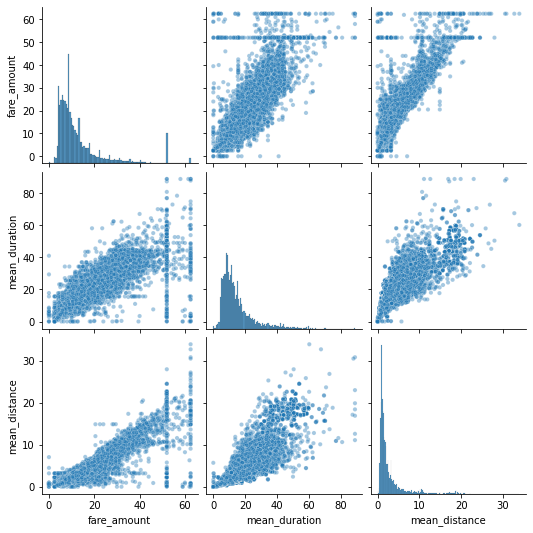

In [115]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df_cleaned[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             )

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [152]:
# Correlation matrix to help determine most correlated variables
df_cleaned.corr(method="pearson")

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


Visualize a correlation heatmap of the data.

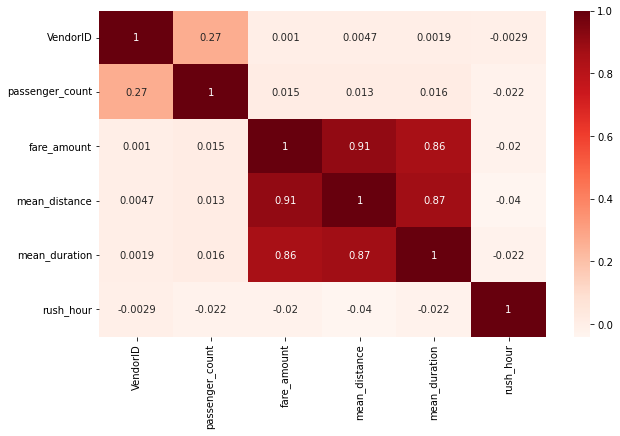

In [153]:
# Create correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(method='pearson'), annot=True, cmap='Reds')

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [154]:
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [155]:
# Remove the target column from the features
X = df_cleaned.drop(columns='fare_amount')

# Set y variable
y = df_cleaned[["fare_amount"]]

# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,2,1,3.521667,22.847222,1
2,1,1,3.521667,22.847222,0
3,2,1,3.521667,22.847222,0
4,1,1,3.521667,22.847222,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [156]:
# Convert VendorID to string
X["VendorID"] = X["VendorID"].astype(str)

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.521667,22.847222,1,1
2,1,3.521667,22.847222,0,0
3,1,3.521667,22.847222,0,1
4,1,3.521667,22.847222,0,0


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [157]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [158]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled)

[[-0.50094892 -0.29009058 -0.53955827 -0.64593537 -1.12136478]
 [-0.50094892 -0.4714944  -0.55020058 -0.64593537  0.89177047]
 [ 2.6016198  -0.5155184   0.19898118  1.54814251  0.89177047]
 ...
 [-0.50094892 -0.50400503 -0.58559084  1.54814251 -1.12136478]
 [ 0.27469326 -0.57343649 -0.76745045 -0.64593537 -1.12136478]
 [-0.50094892 -0.53000005 -0.60188083  1.54814251 -1.12136478]]


### Fit the model

Instantiate your model and fit it to the training data.

In [159]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [160]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8486364016161807
R^2: 0.8486364016161806
MAE: 2.1651958053818348
MSE: 16.65437959212244
RMSE: 4.080977774029459


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [161]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [162]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coefficient of determination: 0.833060633355954
R^2: 0.833060633355954
MAE: 2.1954382042110727
MSE: 19.26698090258817
RMSE: 4.389416920570222


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [163]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()



,actual,predicted,residual
5818,6.0,8.489408,-2.489408
18134,30.0,25.749296,4.250704
4655,7.0,10.003046,-3.003046
7378,5.5,5.756136,-0.256136
13914,14.5,14.693127,-0.193127


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

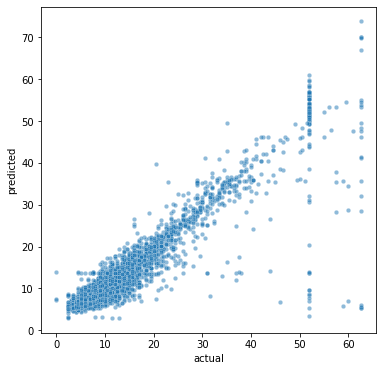

In [164]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)

Visualize the distribution of the `residuals` using a histogram.

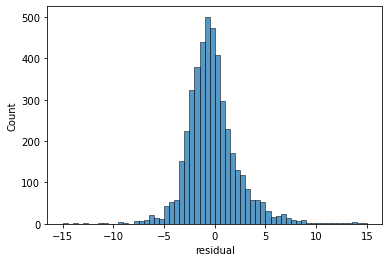

In [165]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))



In [147]:
# Calculate residual mean
results['residual'].mean()

0.04333146247857495

Create a scatterplot of `residuals` over `predicted`.

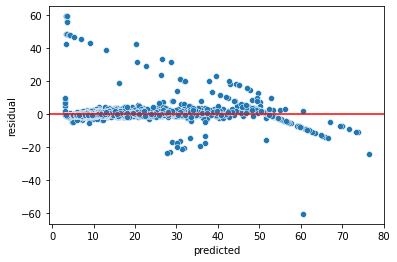

In [149]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [166]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.025097,7.127896,2.792128,0.102317,-0.032742


What do these coefficients mean? How should they be interpreted?

mean_distance and mean_duration seem to have the strongest correlation with fare_amount. A one standard deviation higher mean distance c.p. (ceteris paribus) is associated to a $7.12 higher fare amount.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 